<a href="https://colab.research.google.com/github/Valtern/PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import glob as glob

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 59


/tmp/ipython-input-1920622359.py:16: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


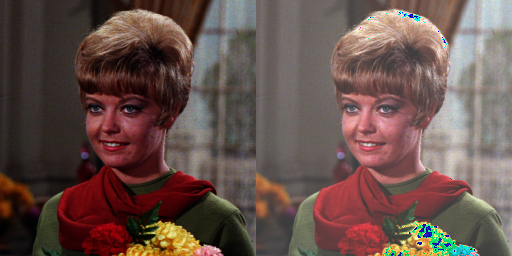

In [65]:

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
brightness_image = np.zeros(original. shape, original.dtype)


#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Practicum Task

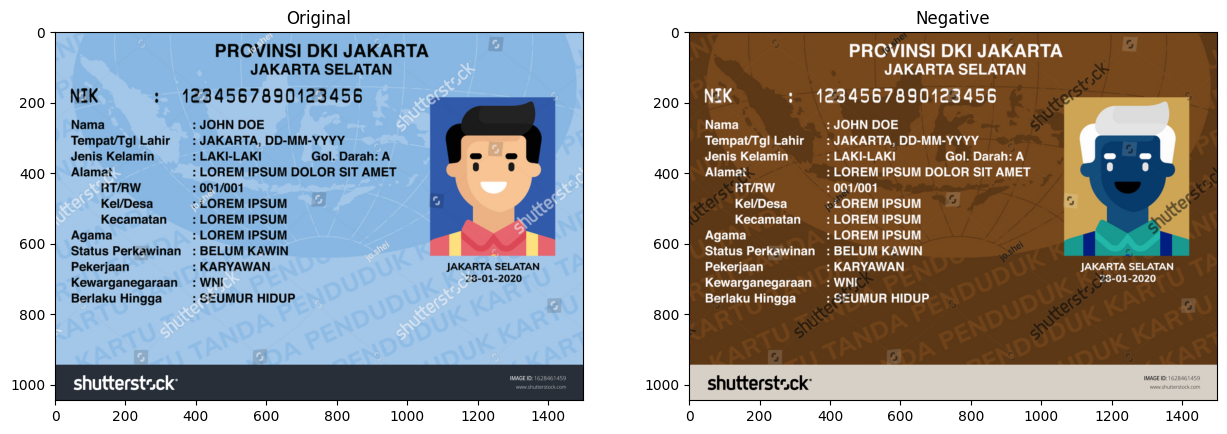

In [11]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Image/ktp.jpg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
ktporg = ktp.copy()


ktp = 255 - ktp

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(ktporg)

plt.subplot(2,2,2)
plt.title('Negative')
plt.imshow(ktp)

plt.tight_layout
plt.show()

Enter a contrast: 0.8
Enter a brightness: 50


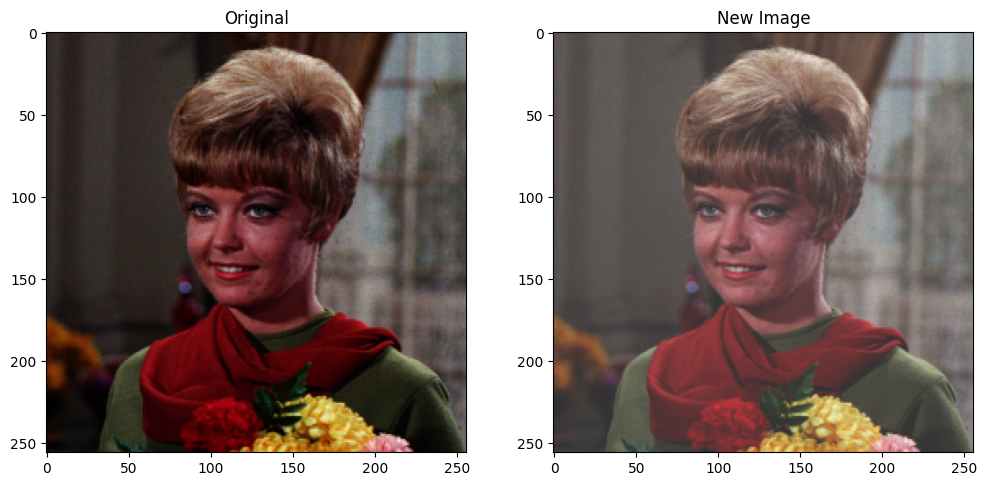

In [14]:
og2 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
ogog2 = og2.copy()


try :
  contrast = float(input('Enter a contrast: '))
  brightness = int(input('Enter a brightness: '))
except ValueError:
  print('Error, not a number')

for y in range(og2.shape[0]):
  for x in range(og2.shape[1]):
    for c in range(og2.shape[2]):
      newimg = contrast * og2[y,x,c] + brightness
      og2[y,x,c] = np.clip  (newimg, 0, 255 )


plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(cv.cvtColor(ogog2, cv.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title('New Image')
plt.imshow(cv.cvtColor(og2, cv.COLOR_BGR2RGB))

plt.tight_layout
plt.show()

Enter a brightness: 200


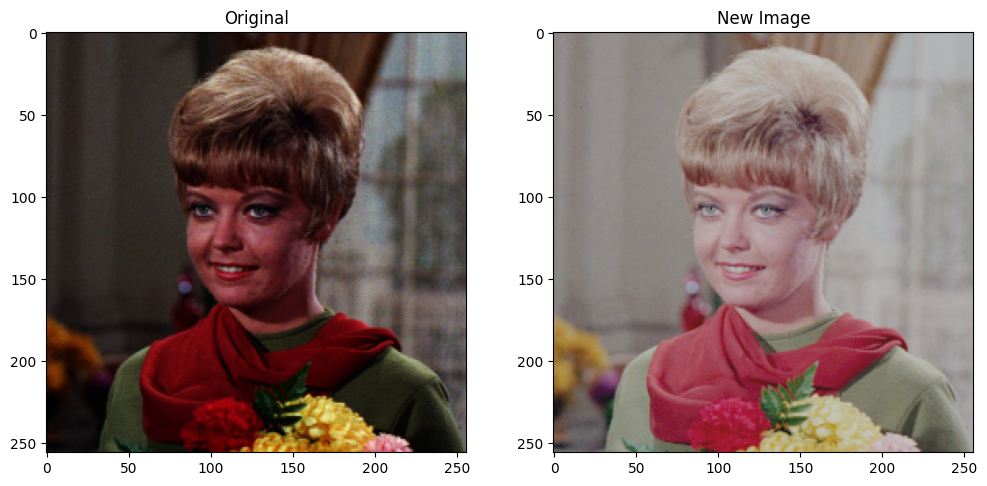

In [16]:
og4 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
og4f = og4.copy().astype('float')

try:
  brightness = int(input('Enter a brightness: '))
except ValueError:
  print('Error, not a number')


c = brightness / np.log(1 + np.max(og4f))

for y in range(og4.shape[0]):
  for x in range(og4.shape[1]):
    for z in range(og4.shape[2]):
      original_pixel = og4f[y,x,z]
      s = c * np.log(1 + original_pixel)
      og4f[y,x,z] = np.clip(s, 0, 255)

output_og4 = np.array(og4f, dtype='uint8')

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(cv.cvtColor(og4, cv.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title('New Image')
plt.imshow(cv.cvtColor(output_og4, cv.COLOR_BGR2RGB))

plt.tight_layout
plt.show()


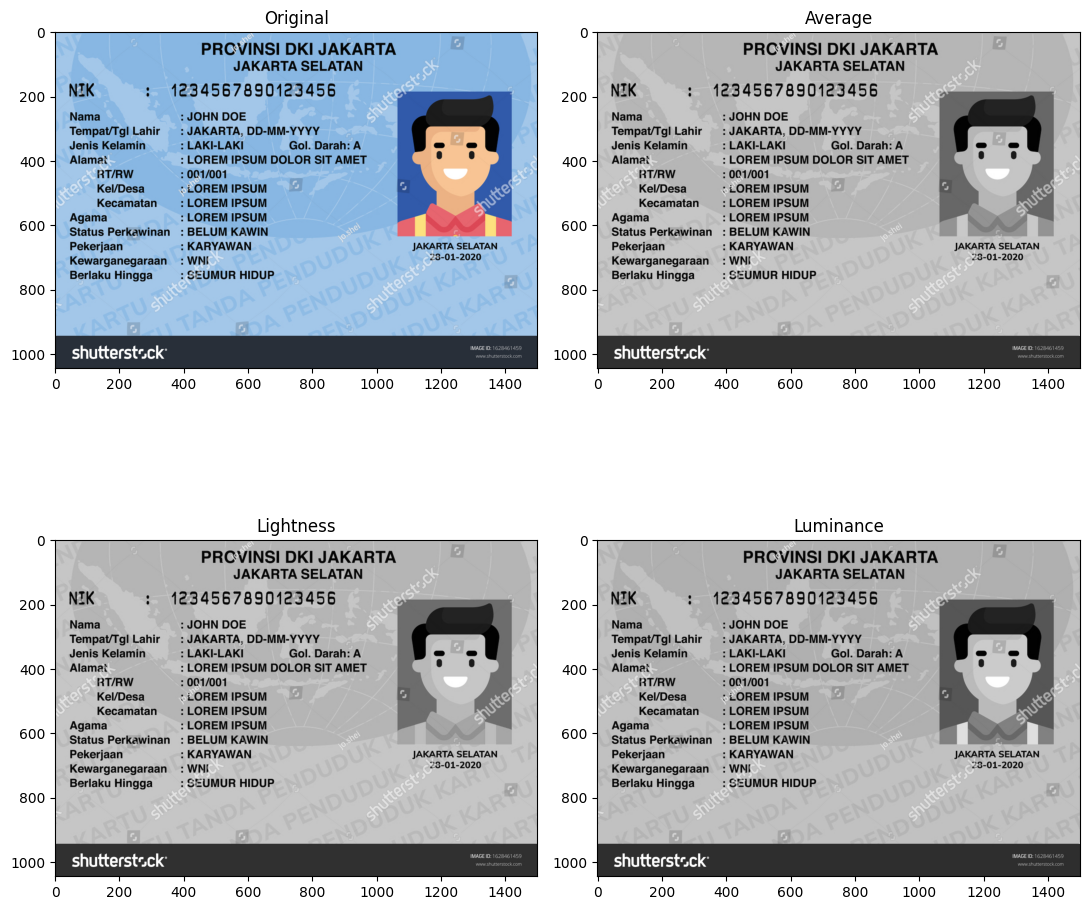

In [18]:
og5 = cv.imread('/content/drive/MyDrive/PCVK/Image/ktp.jpg')

og5gaver = np.zeros(og5.shape, og5.dtype)
og5gliver = np.zeros(og5.shape, og5.dtype)
og5gluver = np.zeros(og5.shape, og5.dtype)


for y in range(og5.shape[0]):
  for x in range(og5.shape[1]):
    b, g, r = og5[y, x]
    grayavg = (int(b) + int(g) + int(r)) / 3
    graylight = (int(max(b, g, r)) + int(min(b, g, r))) / 2
    graylum = 0.21 * r + 0.72 * g + 0.07 * b

    og5gaver[y, x] = [grayavg, grayavg, grayavg]
    og5gliver[y, x] = [graylight, graylight, graylight]
    og5gluver[y, x] = [graylum, graylum, graylum]

plt.figure(figsize=(11, 11))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(og5, cv.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(og5gaver, cv.COLOR_BGR2RGB))
plt.title("Average")

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(og5gliver, cv.COLOR_BGR2RGB))
plt.title("Lightness")

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(og5gluver, cv.COLOR_BGR2RGB))
plt.title("Luminance")

plt.tight_layout()
plt.show()

# D2 Practicum

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


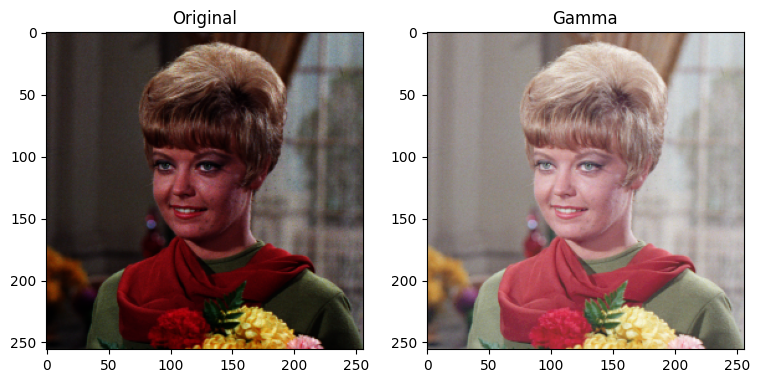

In [31]:
og6 = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff')
og6 = cv.cvtColor(og6, cv.COLOR_BGR2RGB)
og6f = og6.copy().astype('float')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')




for y in range(og6f.shape[0]):
  for x in range(og6f.shape[1]):
    for z in range(og6f.shape[2]):
      gammaorg = og6f[y,x,z]
      output = 255 * (gammaorg / 255) ** (1 / gamma)
      og6f[y,x,z] = np.clip(output, 0, 255)

finalres = np.array(og6f, dtype='uint8')

plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(og6)


plt.subplot(1,2,2)
plt.title('Gamma')
plt.imshow(finalres)



plt.tight_layout
plt.show()

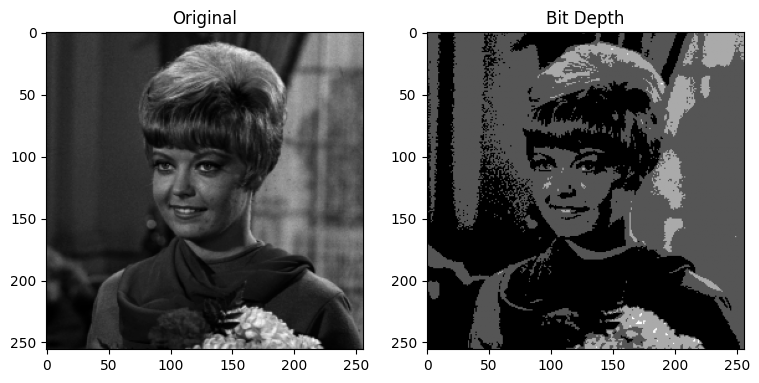

In [37]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)

outimg = original.copy()


for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    orgpix = original[y,x]
    newimg = round(original[y,x] / level) * level
    outimg[y,x] = newimg


plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(original, cmap='grey')

plt.subplot(1,2,2)
plt.title('Bit Depth')
plt.imshow(outimg, cmap='grey')

plt.tight_layout
plt.show()